In [1]:
import heeps
%pylab
%matplotlib inline

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


In [2]:
def get_offsets(name, rstar, nr=4):
    dr = rstar/(nr-0.5)
    offsets = np.array([[0,0]])
    for R in np.arange(rstar/dr)*dr:
        npts = int(round(2*np.pi*R/dr))
        for TH in np.arange(npts)*2*np.pi/npts:
            Z = R*np.exp(1j*TH)
            offsets = np.vstack((offsets, [np.real(Z), np.imag(Z)]))
    print('noffsets = %s'%len(offsets))
    scatter(offsets[:,0],offsets[:,1])
    circ = Circle((0,0),rstar,linestyle=':',color='k',Fill=False)
    ax = gca()
    ax.add_artist(circ)
    ax.axis('equal')
    xlabel('x (mas)')
    ylabel('y (mas)')
    title('R = %s mas (%s) - %s pts'%(rstar,name,len(offsets)))
    savefig('offsets_%s_mas_%s_pts.png'%(rstar,len(offsets)))
    return offsets

# Point source

Update config: band=L, mode=RAVC
‾‾‾‾‾‾‾‾‾‾‾‾‾‾
   loading vortex back-propagation params
   vc_charge=2, ngrid=1024, beam_ratio=0.2568
   ravc_calc=True, ravc_t=0.7608, ravc_r=0.6213
   npupil=285, pscale=5.47 mas, lam=3.8112E-06 m
   ndet=403, hfov=1.1 arcsec (51.74 lam/D)

Load pupil from 'ELT_allglass.fits'
   diam=36.905 m, resize to 285 pix, zero-pad to 1024 pix

Create ring apodizer
   ravc_t=0.7608, ravc_r=0.6213
   ravc_misalign=[0 0 0 0 0 0]

Apply Vortex phase mask

Create Lyot stop
   ls_int=0.6507, ls_ext=0.9705, ls_spi=0.0522

Extract PSF on the detector

I_psf = 0.00027171447630459293


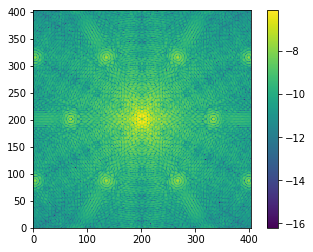

In [9]:
conf = dict(
    band = 'L',
    mode = 'RAVC',
    file_lyot_stop = '', # 'ls_ravc_allglass_285.fits',
    fp_offsets = None,
)
conf = heeps.config.read_config(verbose=False, **conf)
conf = heeps.config.update_config(saveconf=True, verbose=True, **conf) 
wf = heeps.pupil.pupil(savefits=True, verbose=True, **conf)
psf = heeps.wavefront.propagate_one(wf, onaxis=True, savefits=True, verbose=True, **conf)
imshow(np.log10(psf), origin=True); colorbar()
print('I_psf = %s'%np.sum(psf))

# pi1 Gru, r=9.18

noffsets = 39
Update config: band=L, mode=RAVC
‾‾‾‾‾‾‾‾‾‾‾‾‾‾
   ravc_calc=True, ravc_t=0.7608, ravc_r=0.6213
   npupil=285, pscale=5.47 mas, lam=3.8112E-06 m
   ndet=403, hfov=1.1 arcsec (51.74 lam/D)

Load pupil from 'ELT_allglass.fits'
   diam=36.905 m, resize to 285 pix, zero-pad to 1024 pix

Create ring apodizer
   ravc_t=0.7608, ravc_r=0.6213
   ravc_misalign=[0 0 0 0 0 0]



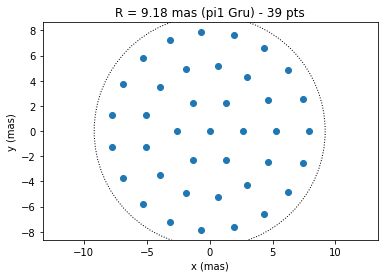

In [6]:
conf.update(
    fp_offsets = get_offsets('pi1 Gru', 9.18),
)
conf = heeps.config.read_config(verbose=False, **conf)
conf = heeps.config.update_config(saveconf=True, verbose=True, **conf) 
wf = heeps.pupil.pupil(savefits=True, verbose=True, **conf)
psf = heeps.wavefront.propagate_one(wf, onaxis=True, savefits=True, verbose=True, **conf)

0.036392403270244573

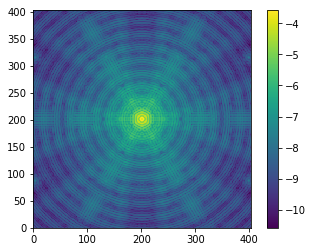

In [7]:
imshow(np.log10(psf), origin=True); colorbar()
np.sum(psf)

# alpha Cen, r=4.26

noffsets = 39
Update config: band=L, mode=RAVC
‾‾‾‾‾‾‾‾‾‾‾‾‾‾
   ravc_calc=True, ravc_t=0.7608, ravc_r=0.6213
   npupil=285, pscale=5.47 mas, lam=3.8112E-06 m
   ndet=403, hfov=1.1 arcsec (51.74 lam/D)

Load pupil from 'ELT_allglass.fits'
   diam=36.905 m, resize to 285 pix, zero-pad to 1024 pix

Create ring apodizer
   ravc_t=0.7608, ravc_r=0.6213
   ravc_misalign=[0 0 0 0 0 0]



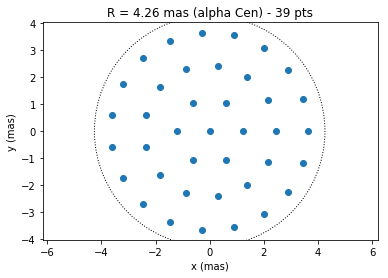

In [8]:
conf.update(
    fp_offsets = get_offsets('alpha Cen', 4.26),
)
conf = heeps.config.read_config(verbose=False, **conf)
conf = heeps.config.update_config(saveconf=True, verbose=True, **conf) 
wf = heeps.pupil.pupil(savefits=True, verbose=True, **conf)
psf = heeps.wavefront.propagate_one(wf, onaxis=True, savefits=True, verbose=True, **conf)

0.00888106970933059

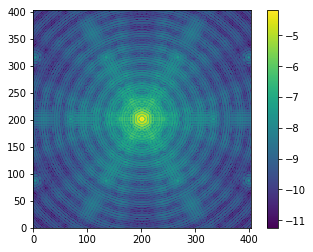

In [8]:
imshow(np.log10(psf), origin=True); colorbar()
np.sum(psf)